In [1]:
import os 
import cv2
import PIL
import torch
import torchvision
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.utils import flow_to_image

In [18]:
path = './output/zglider/'
f01 = torch.tensor(np.load(path+'f01.npy')).unsqueeze(0)
f10 = torch.tensor(np.load(path+'f10.npy')).unsqueeze(0)
ft0gt = torch.tensor(np.load(path+'ft0gt.npy')).unsqueeze(0)
ft1gt = torch.tensor(np.load(path+'ft1gt.npy')).unsqueeze(0)
print(f01.shape, f01.mean(), f01.min(), f01.max(), f01.dtype, type(f01))

torch.Size([1, 2, 520, 960]) tensor(6.9947) tensor(-10.6632) tensor(18.8268) torch.float32 <class 'torch.Tensor'>


In [19]:
def view_flow(flow):
    topilimage = torchvision.transforms.ToPILImage()
    flow_img = flow_to_image(flow)
    flow_img = topilimage(flow_img)
    flow_img = cv2.cvtColor(np.asarray(flow_img), cv2.COLOR_BGR2HSV)
    plt.imshow(flow_img)
    plt.show()

def batch_forward_warping_tensor(flow):
    flow = flow * 0.5
    batch, channels, height, width = flow.size()
    warped_image = torch.zeros_like(flow)

    grid_x, grid_y = torch.meshgrid(torch.arange(width), torch.arange(height))
    grid_x = grid_x.float().T
    grid_y = grid_y.float().T

    flow_x = flow[:, 0]
    flow_y = flow[:, 1]

    new_x = grid_x.unsqueeze(0).expand(batch, -1, -1) + flow_x
    new_y = grid_y.unsqueeze(0).expand(batch, -1, -1) + flow_y

    valid_mask = (new_x >= 0) & (new_x < width) & (new_y >= 0) & (new_y < height)

    new_x = new_x.clamp(0, width - 1)
    new_y = new_y.clamp(0, height - 1)

    for b in range(batch):
        for c in range(channels):
            warped_image[b, c, valid_mask[b]] = flow[b, c].reshape(height,width)[new_y[b, valid_mask[b]].long(), new_x[b, valid_mask[b]].long()]

    return warped_image

def calculate_distance(x, y):
    distance = math.sqrt(x**2 + y**2)
    return distance

def plot_histogram(data, bins=10):
    plt.hist(data, bins=bins)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()


torch.Size([1, 2, 520, 960])


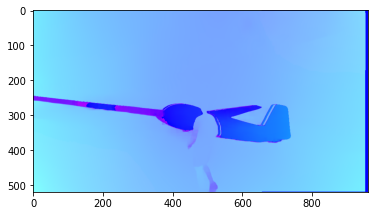

In [20]:
ft1 = batch_forward_warping_tensor(f01)
print(ft1.shape)
view_flow(ft1[0])

torch.Size([1, 2, 520, 960])


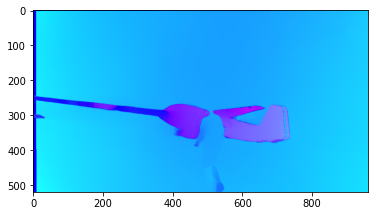

In [21]:
ft0 = batch_forward_warping_tensor(f10)
print(ft0.shape)
view_flow(ft0[0])

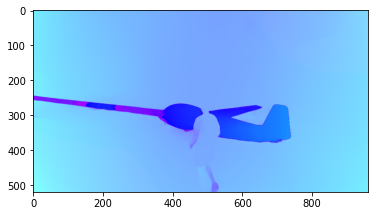

In [22]:
view_flow(f01[0])

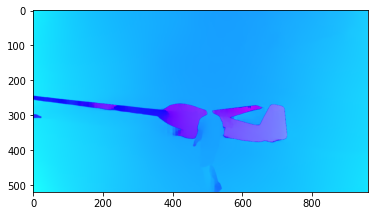

In [23]:
view_flow(f10[0])

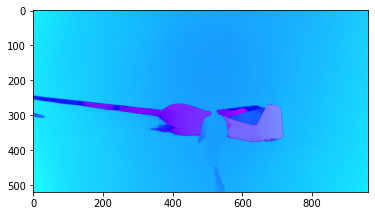

In [24]:
view_flow(ft1gt[0])

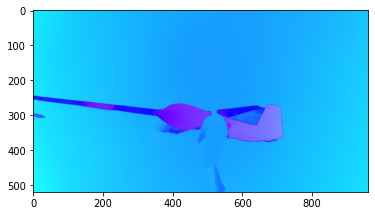

In [25]:
view_flow(ft0gt[0])